In [1]:
import mido
import string
import numpy as np
import math
from music21 import converter, instrument, note, chord, stream
import glob
import pypianoroll

In [2]:
def arry2mid(ary, tempo=200):
    # get the difference
    new_ary = np.concatenate([np.array([[0] * 128]), np.array(ary)], axis=0)
    changes = new_ary[1:] - new_ary[:-1]
    # create a midi file with an empty track
    mid_new = mido.MidiFile()
    track = mido.MidiTrack()
    mid_new.tracks.append(track)
    track.append(mido.MetaMessage('set_tempo', tempo=tempo, time=6))
    # add difference in the empty track
    last_time = 0
    for ch in changes:
        if set(ch) == {0}:  # no change
            last_time += 1
        else:
            on_notes = np.where(ch > 0)[0]
            on_notes_vol = ch[on_notes]
            off_notes = np.where(ch < 0)[0]
            first_ = True
            for n, v in zip(on_notes, on_notes_vol):
                new_time = last_time if first_ else 0
                track.append(mido.Message('note_on', note=n + 21, velocity=v, time=new_time))
                first_ = False
            for n in off_notes:
                new_time = last_time if first_ else 0
                track.append(mido.Message('note_off', note=n + 21, velocity=0, time=new_time))
                first_ = False
            last_time = 0
    return mid_new

In [3]:
def process_data():
    bar_set = []
    for file in glob.glob("midi/*.mid"):
        print(file)
        mt = pypianoroll.read(file)
        violin1 = mt.tracks[0].pianoroll
        violin2 = mt.tracks[1].pianoroll
        viola = mt.tracks[2].pianoroll
        cello = mt.tracks[3].pianoroll

        violin1 = violin1[:, 24:108]
        violin2 = violin2[:, 24:108]
        viola = viola[:, 24:108]
        cello = cello[:, 24:108]
        #print(violin1.dtype)
        n = int(violin1.shape[0]/384)

        while n>1:
            
            data = np.zeros((4, 96, 84, 4))
            for i in range(4):
                #print(violin1.shape, violin2.shape, viola.shape, cello.shape)
                data[i, :, :, 0] = violin1[i:i+96, :]
                data[i, :, :, 1] = violin2[i:i+96, :]
                data[i, :, :, 2] = viola[i:i+96, :]
                data[i, :, :, 3] = cello[i:i+96, :]

            violin1 = violin1[4*96:,:]
            violin2 = violin1[4*96:,:]
            viola = violin1[4*96:,:]
            cello = violin1[4*96:,:]
            n-=1
            bar_set.append(data)
        """
        while n>1:
            
            data = np.zeros((4, 96, 84, 4))
            for i in range(4):
                #print(violin1.shape, violin2.shape, viola.shape, cello.shape)
                data[0, :, :, i] = violin1[i:i+96, :]
                data[1, :, :, i] = violin2[i:i+96, :]
                data[2, :, :, i] = viola[i:i+96, :]
                data[3, :, :, i] = cello[i:i+96, :]

            violin1 = violin1[4*96:,:]
            violin2 = violin1[4*96:,:]
            viola = violin1[4*96:,:]
            cello = violin1[4*96:,:]
            n-=1
            bar_set.append(data)"""
            
    return bar_set

In [4]:
DataS = process_data()

midi/haydn_string_quartet_64_5_(c)harfesoft.mid
midi/mozart_string_quartet_387_2_(nc)mutopia.mid
midi/haydn_string_quartet_77_1_(c)harfesoft.mid


/Users/tyler/opt/anaconda3/lib/python3.8/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


midi/mozart_string_quartet_464_3_(nc)mutopia.mid
midi/string_quartet_73_5_(c)bachovich.mid
midi/mozart_string_quartet_465_1_(nc)mutopia (1).mid
midi/quartet_33_5_4_(c)simonetto.mid
midi/quartet_33_1_2_(c)simonetto.mid
midi/quartet_33_3_1_(c)simonetto.mid
midi/haydn_string_quartet_33_3_(c)harfesoft.mid
midi/mozart_string_quartet_458_1_(nc)mutopia.mid
midi/mozart_string-quartet_80_3_(nc)wittenburg.mid
midi/haydn_string_quartet_54_1_(c)harfesoft.mid
midi/string_quartet_73_1_(c)bachovich.mid
midi/piano_quintet_57_1b_(c)bachovich.mid
midi/haydn_string_quartet_20_3_(c)harfesoft.mid
midi/quartet_33_2_2_(c)simonetto.mid
midi/quartet_33_6_4_(c)simonetto.mid
midi/mozart_string_quartet_428_2_(nc)mutopia.mid
midi/brahms_string_quartet_51_1_(c)harfesoft.mid
midi/haydn_string_quartet_74_1_(c)harfesoft.mid
midi/beethoven_string_quartet_74_(c)harfesoft.mid
midi/mozart_string_quartet_464_4_(nc)mutopia.mid
midi/string_quartet_49_3_(c)bachovich.mid
midi/tchajkowski_string_quartet_30_(c)harfesoft.mid
midi

In [5]:
print(DataS[0].shape)
print(len(DataS))
total_n = 0
none_zero = 0
max_n = 0

RealD= np.zeros((len(DataS), 4, 96, 84, 4))
for i in range(len(DataS)):
    RealD[i] = DataS[i]
    none_zero += np.count_nonzero(DataS[i])
    total_n += np.sum(DataS[i])
    curr_m = np.amax(DataS[i])
    if curr_m>max_n:
        max_n= curr_m


(4, 96, 84, 4)
10269


In [6]:
print(total_n/none_zero)
print(max_n)
result_set=[]

78.5050908158017
224.0


In [7]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Conv2DTranspose, Concatenate, Activation
from keras.layers import BatchNormalization, Activation, ZeroPadding2D, ReLU
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv3D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv3DTranspose
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

import sys

import numpy as np

class DCGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 96
        self.img_cols = 84
        self.channels = 4
        self.img_shape = (4, self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 128
        self.time_dim = 32

        optimizer = Adam(0.005, 0.6)
        optimizer2 = Adam(0.0005, 0.6)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer2,
            metrics=['accuracy'])

        # Build the generator
        
        self.t0 = self.build_timeG()
        self.t1 = self.build_timeG()
        self.t2 = self.build_timeG()
        self.t3 = self.build_timeG()
        self.t4 = self.build_timeG()
        tz = Input(shape=(1,self.time_dim,1))
        ta = Input(shape=(1,self.time_dim,1))
        tb = Input(shape=(1,self.time_dim,1))
        tc = Input(shape=(1,self.time_dim,1))
        td = Input(shape=(1,self.time_dim,1))
        
        tq = Input(shape=(1,self.time_dim,1))
        tw = Input(shape=(1,self.time_dim,1))
        te = Input(shape=(1,self.time_dim,1))
        tr = Input(shape=(1,self.time_dim,1))
        tx = Input(shape=(1,self.time_dim,1))
        #z = Input(shape=(self.latent_dim,))
        
        #generate 4bars of conductor signal
        time01 = self.t0(tz)
        time02 = self.t0(tz)
        time03 = self.t0(tz)
        time04 = self.t0(tz)
        
        #generate 4 bars of violin1 signal
        time11 = self.t1(ta)
        time12 = self.t1(ta)
        time13 = self.t1(ta)
        time14 = self.t1(ta)
        
        #generate 4 bars of violin2 signal
        time21 = self.t2(tb)
        time22 = self.t2(tb)
        time23 = self.t2(tb)
        time24 = self.t2(tb)
        
        #generate 4 bars of viola signal
        time31 = self.t3(tc)
        time32 = self.t3(tc)
        time33 = self.t3(tc)
        time34 = self.t3(tc)
        
        #generate 4 bars of cello signal
        time41 = self.t4(td)
        time42 = self.t4(td)
        time43 = self.t4(td)
        time44 = self.t4(td)
        
        #concatenate for violin1
        timeA1 = Concatenate(axis=2)([time01, tx, time11, tq])
        timeA2 = Concatenate(axis=2)([time02, tx, time12, tq])
        timeA3 = Concatenate(axis=2)([time03, tx, time13, tq])
        timeA4 = Concatenate(axis=2)([time04, tx, time14, tq])
        
        #concatenate for violin2
        timeB1 = Concatenate(axis=2)([time01, tx, time21, tw])
        timeB2 = Concatenate(axis=2)([time02, tx, time22, tw])
        timeB3 = Concatenate(axis=2)([time03, tx, time23, tw])
        timeB4 = Concatenate(axis=2)([time04, tx, time24, tw])
        
        #concatenate for viola
        timeC1 = Concatenate(axis=2)([time01, tx, time31, te])
        timeC2 = Concatenate(axis=2)([time02, tx, time32, te])
        timeC3 = Concatenate(axis=2)([time03, tx, time33, te])
        timeC4 = Concatenate(axis=2)([time04, tx, time34, te])
        
        #concatenate for cello
        timeD1 = Concatenate(axis=2)([time01, tx, time41, tr])
        timeD2 = Concatenate(axis=2)([time02, tx, time42, tr])
        timeD3 = Concatenate(axis=2)([time03, tx, time43, tr])
        timeD4 = Concatenate(axis=2)([time04, tx, time44, tr])
 
        
        self.v1 = self.build_generator()
        self.v2 = self.build_generator()
        self.v3 = self.build_generator()
        self.v4 = self.build_generator()
        
        # The generator takes noise as input and generates imgs
        

        violin1A = self.v1(timeA1)
        violin1B = self.v1(timeA2)
        violin1C = self.v1(timeA3)
        violin1D = self.v1(timeA4)
        
        violin2A = self.v2(timeB1)
        violin2B = self.v2(timeB2)
        violin2C = self.v2(timeB3)
        violin2D = self.v2(timeB4)
        
        violaA = self.v3(timeC1)
        violaB = self.v3(timeC2)
        violaC = self.v3(timeC3)
        violaD = self.v3(timeC4)
        
        celloA = self.v4(timeD1)
        celloB = self.v4(timeD2)
        celloC = self.v4(timeD3)
        celloD = self.v4(timeD4)
    
        #tensor_shape = (None, 96, 84, 4)
        # = keras.Input(shape=((1,) + tensor_shape[1:]), dtype = 'int32')

        
        merged1 = Concatenate(axis=1)([violin1A, violin2A, violaA, celloA])
        merged2 = Concatenate(axis=1)([violin1B, violin2B, violaB, celloB])
        merged3 = Concatenate(axis=1)([violin1C, violin2C, violaC, celloC])
        merged4 = Concatenate(axis=1)([violin1D, violin2D, violaD, celloD])
        
        merged = Concatenate(axis=4)([merged1, merged2, merged3, merged4])
        
        print(merged.shape)
        
        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(merged)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        input_set = [tz, ta, tb, tc, td, tx, tq, tw, te, tr]
        self.combined = Model(input_set, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        

        
    def build_generator(self):

        model = Sequential()

        model.add(Reshape([1,1,1,128], input_shape=(1,128,1)))
        
        model.add(Conv3DTranspose(1024, (1,2,1), strides=(1,2,1)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.add(Conv3DTranspose(256, (1,2,1), strides=(1,2,1)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.add(Conv3DTranspose(256, (1,2,1), strides=(1,2,1)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.add(Conv3DTranspose(256, (1,2,1), strides=(1,4,1)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.add(Conv3DTranspose(128, (1,3,1), strides=(1,3,1)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.add(Conv3DTranspose(64, (1,1,7), strides=(1,1,7)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.add(Conv3DTranspose(1, (1,1,12), strides=(1,1,12)))
        model.add(BatchNormalization())
        model.add(Activation('tanh'))
        #model.add(Reshape([None,1,96,84,1]))
        
        model.summary()

        noise = Input(shape=(1,self.latent_dim,1))
        img = model(noise)

        return Model(noise, img)
    
        
    def build_discriminator(self):

        model = Sequential()

        model.add(Conv3D(64, (2,1,1), strides=(1,1,1), input_shape=[4,96,84,4]))
        model.add(LeakyReLU(0.25))
        model.add(Dropout(0.68))
        
        model.add(Conv3D(64, (3,1,1), strides=(1,1,1)))
        model.add(LeakyReLU(0.25))
        model.add(Dropout(0.68))
        
        model.add(Conv3D(64, (1,1,12), strides=(1,1,12), input_shape=[4,96,84,4]))
        model.add(LeakyReLU(0.25))
        model.add(Dropout(0.68))
    
        model.add(Conv3D(64, (1,1,7), strides=(1,1,7)))
        model.add(LeakyReLU(0.25))
        model.add(Dropout(0.68))
        
        model.add(Conv3D(64, (1,2,1), strides=(1,2,1)))
        model.add(LeakyReLU(0.25))
        model.add(Dropout(0.68))
        
        model.add(Conv3D(64, (1,2,1), strides=(1,2,1)))
        model.add(LeakyReLU(0.25))
        model.add(Dropout(0.68))
        
        model.add(Conv3D(128, (1,4,1), strides=(1,2,1)))
        model.add(LeakyReLU(0.25))
        model.add(Dropout(0.68))
        
        model.add(Conv3D(256, (1,3,1), strides=(1,2,1)))
        model.add(LeakyReLU(0.25))
        model.add(Dropout(0.68))
        
        model.add(Dense(1024))
        model.add(LeakyReLU())
        model.add(Flatten())
        model.add(Dense(1))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)
    
    def build_timeG(self):
        model = Sequential()
        model.add(Reshape([1,1,32], input_shape=(1,32,1)))
        model.add(Conv2DTranspose(1024, (1,4), (1,4)))
        model.add(BatchNormalization())
        model.add(ReLU())
        model.add(Conv2DTranspose(1, (1,3), (1,8)))
        model.add(BatchNormalization())
        model.add(ReLU())
        
        model.summary()
        noise = Input(shape=(1,self.time_dim,1))
        img = model(noise)
        
        return Model(noise, img)

    def train(self, epochs, batch_size=128, save_interval=50):


        X_train = RealD
        #X_train = X_train / np.linalg.norm(X_train)
        #print(X_train.shape)
        
        
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            #print("hererererererer")
            #print(imgs.shape)
            #for i in range(imgs.shape[0])

            # Sample noise and generate a batch of new images
            
            n0 = np.random.normal(0, 150, (batch_size, self.time_dim)).reshape(batch_size,1,self.time_dim,1)
            na = np.random.normal(0, 150, (batch_size, self.time_dim)).reshape(batch_size,1,self.time_dim,1)
            nb = np.random.normal(0, 150, (batch_size, self.time_dim)).reshape(batch_size,1,self.time_dim,1)
            nc = np.random.normal(0, 150, (batch_size, self.time_dim)).reshape(batch_size,1,self.time_dim,1)
            nd = np.random.normal(0, 150, (batch_size, self.time_dim)).reshape(batch_size,1,self.time_dim,1)
            nq = np.random.normal(0, 150, (batch_size, self.time_dim)).reshape(batch_size,1,self.time_dim,1)
            nw = np.random.normal(0, 150, (batch_size, self.time_dim)).reshape(batch_size,1,self.time_dim,1)
            ne = np.random.normal(0, 150, (batch_size, self.time_dim)).reshape(batch_size,1,self.time_dim,1)
            nr = np.random.normal(0, 150, (batch_size, self.time_dim)).reshape(batch_size,1,self.time_dim,1)
            nx = np.random.normal(0, 150, (batch_size, self.time_dim)).reshape(batch_size,1,self.time_dim,1)
            
            


            #print(n0.shape)
            tim01 = self.t0.predict(n0)
            tim02 = self.t0.predict(n0)
            tim03 = self.t0.predict(n0)
            tim04 = self.t0.predict(n0)
            
            timA1 = self.t1.predict(na)
            timA2 = self.t1.predict(na)
            timA3 = self.t1.predict(na)
            timA4 = self.t1.predict(na)
            
            timB1 = self.t2.predict(nb)
            timB2 = self.t2.predict(nb)
            timB3 = self.t2.predict(nb)
            timB4 = self.t2.predict(nb)
            
            timC1 = self.t3.predict(nc)
            timC2 = self.t3.predict(nc)
            timC3 = self.t3.predict(nc)
            timC4 = self.t3.predict(nc)
            
            timD1 = self.t4.predict(nd)
            timD2 = self.t4.predict(nd)
            timD3 = self.t4.predict(nd)
            timD4 = self.t4.predict(nd)

            noiseA1 = np.zeros((batch_size, 1, 128, 1))
            noiseA1[:,0,0:32,0] = tim01[:,0,:,0]
            noiseA1[:,0,32:64,0] = nx[:,0,:,0]
            noiseA1[:,0,64:96,0] = timA1[:,0,:,0]
            noiseA1[:,0,96:128,0] = nq[:,0,:,0]
            
            noiseA2 = np.zeros((batch_size, 1, 128, 1))
            noiseA2[:,0,0:32,0] = tim02[:,0,:,0]
            noiseA2[:,0,32:64,0] = nx[:,0,:,0]
            noiseA2[:,0,64:96,0] = timA2[:,0,:,0]
            noiseA2[:,0,96:128,0] = nq[:,0,:,0]
            
            noiseA3 = np.zeros((batch_size, 1, 128, 1))
            noiseA3[:,0,0:32,0] = tim03[:,0,:,0]
            noiseA3[:,0,32:64,0] = nx[:,0,:,0]
            noiseA3[:,0,64:96,0] = timA3[:,0,:,0]
            noiseA3[:,0,96:128,0] = nq[:,0,:,0]
            
            noiseA4 = np.zeros((batch_size, 1, 128, 1))
            noiseA4[:,0,0:32,0] = tim04[:,0,:,0]
            noiseA4[:,0,32:64,0] = nx[:,0,:,0]
            noiseA4[:,0,64:96,0] = timA4[:,0,:,0]
            noiseA4[:,0,96:128,0] = nq[:,0,:,0]
            
            
                
            noiseB1 = np.zeros((batch_size, 1, 128, 1))
            noiseB1[:,0,0:32,0] = tim01[:,0,:,0]
            noiseB1[:,0,32:64,0] = nx[:,0,:,0]
            noiseB1[:,0,64:96,0] = timB1[:,0,:,0]
            noiseB1[:,0,96:128,0] = nw[:,0,:,0]
            
            noiseB2 = np.zeros((batch_size, 1, 128, 1))
            noiseB2[:,0,0:32,0] = tim02[:,0,:,0]
            noiseB2[:,0,32:64,0] = nx[:,0,:,0]
            noiseB2[:,0,64:96,0] = timB2[:,0,:,0]
            noiseB2[:,0,96:128,0] = nw[:,0,:,0]
            
            noiseB3 = np.zeros((batch_size, 1, 128, 1))
            noiseB3[:,0,0:32,0] = tim03[:,0,:,0]
            noiseB3[:,0,32:64,0] = nx[:,0,:,0]
            noiseB3[:,0,64:96,0] = timB3[:,0,:,0]
            noiseB3[:,0,96:128,0] = nw[:,0,:,0]
            
            noiseB4 = np.zeros((batch_size, 1, 128, 1))
            noiseB4[:,0,0:32,0] = tim04[:,0,:,0]
            noiseB4[:,0,32:64,0] = nx[:,0,:,0]
            noiseB4[:,0,64:96,0] = timB4[:,0,:,0]
            noiseB4[:,0,96:128,0] = nw[:,0,:,0]
            
            

            noiseC1 = np.zeros((batch_size, 1, 128, 1))
            noiseC1[:,0,0:32,0] = tim01[:,0,:,0]
            noiseC1[:,0,32:64,0] = nx[:,0,:,0]
            noiseC1[:,0,64:96,0] = timC1[:,0,:,0]           
            noiseC1[:,0,96:128,0] = ne[:,0,:,0]
            
            noiseC2 = np.zeros((batch_size, 1, 128, 1))
            noiseC2[:,0,0:32,0] = tim02[:,0,:,0]
            noiseC2[:,0,32:64,0] = nx[:,0,:,0]
            noiseC2[:,0,64:96,0] = timC2[:,0,:,0]           
            noiseC2[:,0,96:128,0] = ne[:,0,:,0]
            
            noiseC3 = np.zeros((batch_size, 1, 128, 1))
            noiseC3[:,0,0:32,0] = tim03[:,0,:,0]
            noiseC3[:,0,32:64,0] = nx[:,0,:,0]
            noiseC3[:,0,64:96,0] = timC3[:,0,:,0]           
            noiseC3[:,0,96:128,0] = ne[:,0,:,0]
            
            noiseC4 = np.zeros((batch_size, 1, 128, 1))
            noiseC4[:,0,0:32,0] = tim04[:,0,:,0]
            noiseC4[:,0,32:64,0] = nx[:,0,:,0]
            noiseC4[:,0,64:96,0] = timC4[:,0,:,0]           
            noiseC4[:,0,96:128,0] = ne[:,0,:,0]
            
            

            noiseD1 = np.zeros((batch_size, 1, 128, 1))
            noiseD1[:,0,0:32,0] = tim01[:,0,:,0]          
            noiseD1[:,0,32:64,0] = nx[:,0,:,0]
            noiseD1[:,0,64:96,0] = timD1[:,0,:,0]
            noiseD1[:,0,96:128,0] = nr[:,0,:,0]
            
            noiseD2 = np.zeros((batch_size, 1, 128, 1))
            noiseD2[:,0,0:32,0] = tim02[:,0,:,0]          
            noiseD2[:,0,32:64,0] = nx[:,0,:,0]
            noiseD2[:,0,64:96,0] = timD2[:,0,:,0]
            noiseD2[:,0,96:128,0] = nr[:,0,:,0]
            
            noiseD3 = np.zeros((batch_size, 1, 128, 1))
            noiseD3[:,0,0:32,0] = tim03[:,0,:,0]          
            noiseD3[:,0,32:64,0] = nx[:,0,:,0]
            noiseD3[:,0,64:96,0] = timD3[:,0,:,0]
            noiseD3[:,0,96:128,0] = nr[:,0,:,0]
            
            noiseD4 = np.zeros((batch_size, 1, 128, 1))
            noiseD4[:,0,0:32,0] = tim04[:,0,:,0]          
            noiseD4[:,0,32:64,0] = nx[:,0,:,0]
            noiseD4[:,0,64:96,0] = timD4[:,0,:,0]
            noiseD4[:,0,96:128,0] = nr[:,0,:,0]
        

            vioA1 = self.v1.predict(noiseA1)
            vioA2 = self.v1.predict(noiseA2)
            vioA3 = self.v1.predict(noiseA3)
            vioA4 = self.v1.predict(noiseA4)
            vio1 = np.concatenate([vioA1, vioA2, vioA3, vioA4],axis=1)

            
            vioB1 = self.v2.predict(noiseB1)
            vioB2 = self.v2.predict(noiseB2)
            vioB3 = self.v2.predict(noiseB3)
            vioB4 = self.v2.predict(noiseB4)
            vio2 = np.concatenate([vioB1, vioB2, vioB3, vioB4],axis=1)
            
            vioC1 = self.v3.predict(noiseC1)
            vioC2 = self.v3.predict(noiseC2)
            vioC3 = self.v3.predict(noiseC3)
            vioC4 = self.v3.predict(noiseC4)
            vio3 = np.concatenate([vioC1, vioC2, vioC3, vioC4],axis=1)
            
            vioD1 = self.v4.predict(noiseD1)
            vioD2 = self.v4.predict(noiseD2)
            vioD3 = self.v4.predict(noiseD3)
            vioD4 = self.v4.predict(noiseD4)
            vio4 = np.concatenate([vioD1, vioD2, vioD3, vioD4],axis=1)
            
            quartet = np.zeros((batch_size, 4, 96, 84, 4))
            #print("qwq")
            #print(quartet[:,2,:,:,:].shape)
            #print("qwq")
            quartet[:,0,:,:,:] = vio1[:,0,:,:,:]
            quartet[:,1,:,:,:] = vio2[:,0,:,:,:]
            quartet[:,2,:,:,:] = vio3[:,0,:,:,:]
            quartet[:,3,:,:,:] = vio4[:,0,:,:,:]
            
            #print(quartet.shape)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(quartet, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------
            noise = [n0, na, nb, nc, nd, nx, nq, nw, ne, nr]
            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f] [d_real: %f, d_fake: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss, d_loss_real[0], d_loss_fake[0]))
            g_loss = self.combined.train_on_batch(noise, valid)
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f] [d_real: %f, d_fake: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss, d_loss_real[0], d_loss_fake[0]))
            g_loss = self.combined.train_on_batch(noise, valid)
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f] [d_real: %f, d_fake: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss, d_loss_real[0], d_loss_fake[0]))
            g_loss = self.combined.train_on_batch(noise, valid)
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f] [d_real: %f, d_fake: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss, d_loss_real[0], d_loss_fake[0]))
            g_loss = self.combined.train_on_batch(noise, valid)
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f] [d_real: %f, d_fake: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss, d_loss_real[0], d_loss_fake[0]))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                
                result_set.append(self.save_midi(epoch, vio1, vio2, vio3, vio4))
                if len(result_set) ==0:
                    print("qwqwqwqwqw")
            
    def save_midi(self, epoch, vv1, vv2, vv3, vv4):
        
        
        mi = vv1 #+ vv2 + vv3 + vv4
        print(mi.shape)

        
        mi = mi[0,:,:,:,0]
        midd = np.zeros((384,128))
        midd[0:96,23:107] = mi[0,:,:]
        midd[96:192,23:107] = mi[1,:,:]
        midd[192:288,23:107] = mi[2,:,:]
        midd[288:384,23:107] = mi[3,:,:]
        
        print(type(midd))
        maxxx = np.amax(midd)
        num_non0 = np.count_nonzero(midd)
        tot = np.sum(midd)
        mea = tot/num_non0
        print("mean: %d, max: %d" % (mea, maxxx))
        
        print(midd.shape)
        plt.plot(range(midd.shape[0]), np.multiply(np.where(midd>0, 1, 0), range(0, 128)), marker='.', markersize=1, linestyle='')
        plt.title("%d.mid"%(epoch))
        plt.show()
        return [vv1, vv2, vv3, vv4]
        #mm = arry2mid(midd)
        #mm.save("results/%d.mid" % epoch)
        
        


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 3, 96, 84, 64)     576       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 3, 96, 84, 64)     0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 96, 84, 64)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 1, 96, 84, 64)     12352     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 96, 84, 64)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 96, 84, 64)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 1, 96, 7, 64)      4

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 1, 4, 1024)        132096    
_________________________________________________________________
batch_normalization_8 (Batch (None, 1, 4, 1024)        4096      
_________________________________________________________________
re_lu_8 (ReLU)               (None, 1, 4, 1024)        0         
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 1, 32, 1)          3073      
_________________________________________________________________
batch_normalization_9 (Batch (None, 1, 32, 1)          4         
_________________________________________________________________
re_lu_9 (ReLU)               (None, 1, 32, 1)         

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 1, 1, 1, 128)      0         
_________________________________________________________________
conv3d_transpose_21 (Conv3DT (None, 1, 2, 1, 1024)     263168    
_________________________________________________________________
batch_normalization_31 (Batc (None, 1, 2, 1, 1024)     4096      
_________________________________________________________________
re_lu_28 (ReLU)              (None, 1, 2, 1, 1024)     0         
_________________________________________________________________
conv3d_transpose_22 (Conv3DT (None, 1, 4, 1, 256)      524544    
_________________________________________________________________
batch_normalization_32 (Batc (None, 1, 4, 1, 256)      1024      
_________________________________________________________________
re_lu_29 (ReLU)              (None, 1, 4, 1, 256)     

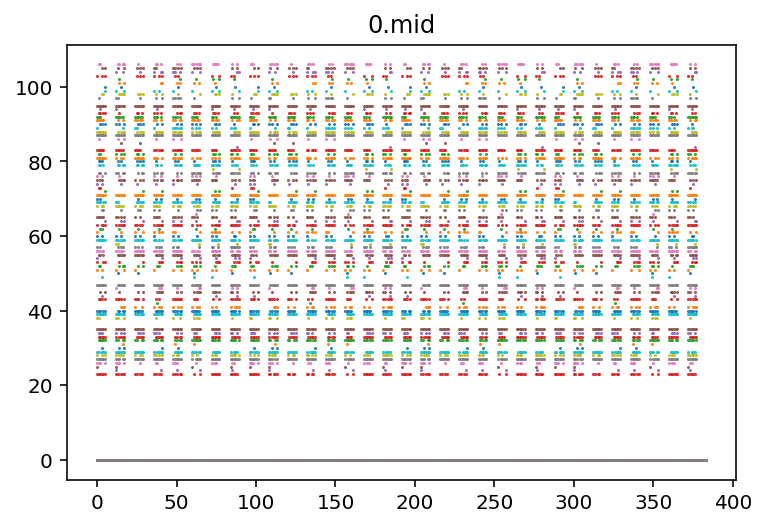

1 [D loss: 4.413196, acc.: 63.75%] [G loss: 8.221603] [d_real: 8.587332, d_fake: 0.239060]
1 [D loss: 4.413196, acc.: 63.75%] [G loss: 6.558180] [d_real: 8.587332, d_fake: 0.239060]


KeyboardInterrupt: 

In [8]:

if __name__ == '__main__':
    dcgan = DCGAN()
    dcgan.train(epochs=7000, batch_size=40, save_interval=50)

In [ ]:
import pickle

In [ ]:
def save_data(data, location):
    num_samp = len(data)
    x = data[0][0]
    arr_data = np.zeros((num_samp, 4, x.shape[0], 4, 96, 84))
    for i in range(num_samp):
        for j in range(4):
            arr_data[i,j,:,:,:,:] = data[i][j][:,:,:,:,0]
    print(arr_data.shape)
    with open(location, 'wb') as f:
        pickle.dump(arr_data,f)

In [ ]:
print(result_set[0][0].shape)
#AAA = result_set.pop()
print(len(result_set))
modified = result_set[2:]


In [ ]:
save_data(modified, "data_v2.pkl")
x = np.load('data_v2.pkl', allow_pickle=True)
print(x.shape)